In [1]:
# coding: utf-8

# https://www.python.org/dev/peps/pep-0008#introduction<BR>
# http://scikit-learn.org/<BR>
# http://pandas.pydata.org/<BR>

#%%
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
### Fetch the data and load it in pandas
data = pd.read_csv('train.csv')
print("Size of the data: ", data.shape)

#%%
# See data (five rows) using pandas tools
#print data.head(2)

Size of the data:  (15120, 56)


In [3]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
### Prepare input to scikit and train and test cut

binary_data = data[np.logical_or(data['Cover_Type'] == 1, data['Cover_Type'] == 2)] # two-class classification set
X = binary_data.drop('Cover_Type', axis=1).values
y = binary_data['Cover_Type'].values
print(np.unique(y))
y = 2 * y - 3 # converting labels from [1,2] to [-1,1]

[1 2]


In [9]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
#%%
# Import cross validation tools from scikit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [11]:
#%%
### Train a single decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8)

# Train the classifier and print training time
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [14]:
X_train

array([[1435, 3305,  205, ...,    0,    0,    0],
       [2592, 2962,   96, ...,    0,    0,    0],
       [2708, 3204,  209, ...,    0,    1,    0],
       ...,
       [7514, 2722,  343, ...,    0,    0,    0],
       [8739, 3102,  254, ...,    0,    0,    0],
       [ 853, 2962,  108, ...,    0,    0,    0]])

In [12]:
#%%
# Do classification on the test dataset and print classification results
from sklearn.metrics import classification_report
target_names = data['Cover_Type'].unique().astype(str).sort()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          -1       0.75      0.79      0.77       425
           1       0.78      0.74      0.76       439

    accuracy                           0.76       864
   macro avg       0.76      0.76      0.76       864
weighted avg       0.77      0.76      0.76       864



In [13]:
#%%
# Compute accuracy of the classifier (correctly classified instances)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7638888888888888


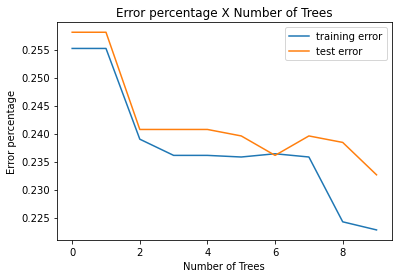

In [42]:
#===================================================================
#%%
### Train AdaBoost

# Your first exercise is to program AdaBoost.
# You can call *DecisionTreeClassifier* as above, 
# but you have to figure out how to pass the weight vector (for weighted classification) 
# to the *fit* function using the help pages of scikit-learn. At the end of 
# the loop, compute the training and test errors so the last section of the code can 
# plot the lerning curves. 
# 
# Once the code is finished, play around with the hyperparameters (D and T), 
# and try to understand what is happening.

D = 2 # tree depth
T = 10 # number of trees
w = np.ones(X_train.shape[0]) / X_train.shape[0] # weight initialization
training_scores = np.zeros(X_train.shape[0]) # init scores with 0
test_scores     = np.zeros(X_test.shape[0])
 
# init errors
training_errors = []
test_errors = []

#===============================
for t in range(T):
    
    model = DecisionTreeClassifier(max_depth=D)
    model.fit(X_train, y_train, sample_weight = w)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    gama_t = np.sum(w[np.where(y_pred_train != y_train)])/np.sum(w)
    alpha_t = 1/2 * np.log((1-gama_t)/gama_t)

    for i in range(X_train.shape[0]):
        w[i] = w[i]*np.exp(alpha_t) if y_pred_train[i] \
                                       != y_train[i] else w[i]
        
    
    #compute errors
    training_scores += alpha_t * y_pred_train
    training_error = len(training_scores[training_scores * y_train < 0]) / len(X_train)
    
    test_scores += alpha_t * y_pred_test
    test_error = len(test_scores[test_scores * y_test < 0]) / len(X_test)
    
    training_errors.append(training_error)
    test_errors.append(test_error)

#===============================

#  Plot training and test error
plt.title('Error percentage X Number of Trees')
plt.ylabel('Error percentage')
plt.xlabel('Number of Trees')
plt.plot(training_errors, label="training error")
plt.plot(test_errors, label="test error")
plt.legend()

2
0.7789351851851852
3
0.7800925925925926
4
0.7777777777777778
5
0.7870370370370371
6
0.7986111111111112
7
0.8252314814814815
8
0.8310185185185185
9
0.8321759259259259
10
0.8310185185185185
11
0.84375
12
0.84375
13
0.8287037037037037
14
0.8275462962962963
15
0.8310185185185185


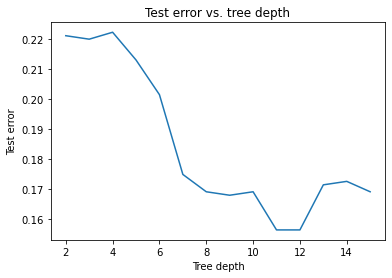

In [50]:
#===================================================================
#%%
### Optimize AdaBoost

# Your final exercise is to optimize the tree depth in AdaBoost. 
# Copy-paste your AdaBoost code into a function, and call it with different tree depths 
# and, for simplicity, with T = 100 iterations (number of trees). Plot the final 
# test error vs the tree depth. Discuss the plot.

def AdaBoost(D, T):
    w = np.ones(X_train.shape[0]) / X_train.shape[0]
    training_scores = np.zeros(X_train.shape[0])
    test_scores = np.zeros(X_test.shape[0])

    ts = plt.arange(len(training_scores))
    training_errors = []
    test_errors = []

    for t in range(T):
    
        model = DecisionTreeClassifier(max_depth=D)
        model.fit(X_train, y_train, sample_weight = w)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        gama_t = np.sum(w[np.where(y_pred_train != y_train)])/np.sum(w)
        alpha_t = 1/2 * np.log((1-gama_t)/gama_t)

        for i in range(X_train.shape[0]):
            w[i] = w[i]*np.exp(alpha_t) if y_pred_train[i] \
                                           != y_train[i] else w[i]


        #compute errors
        training_scores += alpha_t * y_pred_train
        training_error = len(training_scores[training_scores * y_train < 0]) / len(X_train)

        test_scores += alpha_t * y_pred_test
        test_error = len(test_scores[test_scores * y_test < 0]) / len(X_test)

#         training_errors.append(training_error)
#         test_errors.append(test_error)
        
    print(accuracy_score(np.sign(y_test),np.sign(test_scores)))

    return test_error



Ds = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
final_test_errors = []
for D in Ds:
    print(D)
    final_test_errors.append(AdaBoost(D, 100))


plt.plot(Ds, final_test_errors)
plt.title("Test error vs. tree depth")
plt.ylabel("Test error")
plt.xlabel("Tree depth")
plt.show()

In [53]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth= 10))
adaboost.fit(X_train, y_train)
accuracy_score(y_test,adaboost.predict(X_test))

0.8217592592592593